In [1]:
from torchvision import transforms, models
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import pickle
import faiss
import torch

In [ ]:
# img_paths used below with FAISS code
with open('/Users/umar/UWaterloo/Musashi Winter Co-op/resources-lobe/lobe_img_paths.pickle', 'rb') as f:  
    img_paths = pickle.load(f)
with open('/Users/umar/UWaterloo/Musashi Winter Co-op/resources-lobe/lobe_features.pickle', 'rb') as f:  
    features = pickle.load(f)

img_paths = [os.path.join("../src/", path) for path in img_paths]
img_paths

In [3]:
# Model
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using Deivce:", DEVICE)
# We use ResNet for its short feature length of 2048 compared to 25k+ of Vgg etc.
# Which means more efficient nearest neighbor search and lower the curse of dimensionality.
model = models.resnet101(pretrained=True)
model.to(DEVICE)

# Helper fxn
def pooling_output(x):
    global model
    for layer_name, layer in model._modules.items():
        x = layer(x)
        if layer_name == 'avgpool':
            break
    return x

# Image Transform (preprocessing)
transform = transforms.Compose([
    transforms.Resize(size=[224, 224], interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])

# The feature length that ResNet outputs
dimension = 2048

# index = faiss.IndexFlatIP(2048)
# index.add(features)

# Add trained features to FAISS index
index = faiss.IndexFlatL2(dimension) 
index.add(features)

# print(type(index))

# print(index.__sizeof__(), "bytes")
# print(features.__sizeof__(), "bytes")

Using Deivce: cpu


/Users/umar/opt/anaconda3/envs/dropletDash/lib/python3.9/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


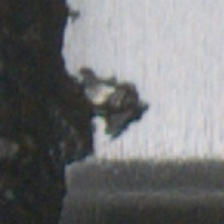

In [16]:
# query_image = '/Users/umar/UWaterloo/Musashi Winter Co-op/Datasets/lobe/_por_dirt__47.357264_Class_1_GJKZA21203070801JT4E 6A267 AA_60_lobe_bot_2021_07_22_19_12_10_0_.jpg'
my_index = 3137
query_image = img_paths[my_index]
# query_image = test_img_paths[1][0]
# print(query_image)
# print(classname(query_image))
PIL_img = Image.open(query_image)
PIL_img = PIL_img.convert('RGB')
PIL_img

In [17]:
# Image Transform (preprocessing)
transform = transforms.Compose([
    transforms.Resize(size=[224, 224], interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])

input_tensor = transform(PIL_img)
input_tensor = input_tensor.view(1, *input_tensor.shape)

# Helper fxn
def pooling_output(x):
    global model
    for layer_name, layer in model._modules.items():
        x = layer(x)
        if layer_name == 'avgpool':
            break
    return x

# Search index for neighbor embeddings
with torch.no_grad():
  query_descriptors = pooling_output(input_tensor.to(DEVICE))
  query_descriptors = query_descriptors.cpu()
  query_descriptors = query_descriptors.detach()
  query_descriptors = query_descriptors.numpy()
  query_descriptors = query_descriptors.reshape(1, 2048)
  distances, indices = index.search(query_descriptors, 9)

print("input:", query_descriptors)
print("input shape:", query_descriptors.shape)
print("input type:", type(query_descriptors))

# test_feature = features[my_index].reshape(1, 2048)

# print("input:", test_feature)
# print("input shape:", test_feature.shape)
# print("input type:", type(test_feature))

# distances, indices = index.search(test_feature, 9)
fig, ax = plt.subplots(3, 3, figsize=(15,15))

i = 0
for file_index, ax_i in zip(indices[0], np.array(ax).flatten()):
  ax_i.imshow(plt.imread(img_paths[file_index]))
  ax_i.set_title("Distance: " +
              str(float("{0:.2f}".format(distances[0][i]))))
  i+=1

plt.show()

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/Users/umar/opt/anaconda3/envs/dropletDash/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/Users/umar/opt/anaconda3/envs/dropletDash/lib/python3.9/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [70]:
transform = transforms.Compose([
    transforms.Resize(size=[224, 224], interpolation=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
])

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using Deivce:", DEVICE)
model = models.resnet50(pretrained=True)
model.to(DEVICE)

def pooling_output(x):
    global model
    for layer_name, layer in model._modules.items():
        x = layer(x)
        if layer_name == 'avgpool':
            break
    return x

input_tensor = transform(PIL_img)
input_tensor = input_tensor.view(1, *input_tensor.shape)

with torch.no_grad():
    query_descriptors = pooling_output(input_tensor.to(DEVICE)).cpu().numpy()

/Users/umar/opt/anaconda3/envs/dropletDash/lib/python3.9/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


Using Deivce: cpu


In [29]:
indices

array([[5291, 5505, 3429, 5912, 5891, 5266, 5027, 4746, 5067]])

In [31]:
distance

array([[245.03294, 248.73718, 252.48227, 253.74625, 255.88734, 257.39197,
        264.96768, 265.09857, 266.74304]], dtype=float32)

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=9, algorithm='brute',metric='euclidean').fit(features)

In [14]:
# Helper function to get the classname and filename
def classname_filename(str):
    return (str.split('/')[-2] + '/' + str.split('/')[-1])[0:20]

# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) +
                         "\nDistance: " +
                         str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)

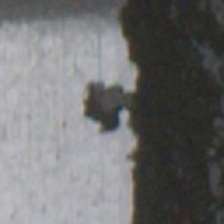

In [60]:
query_image = img_paths[my_index]

PIL_img = Image.open(query_image)
PIL_img = PIL_img.convert('RGB')
PIL_img

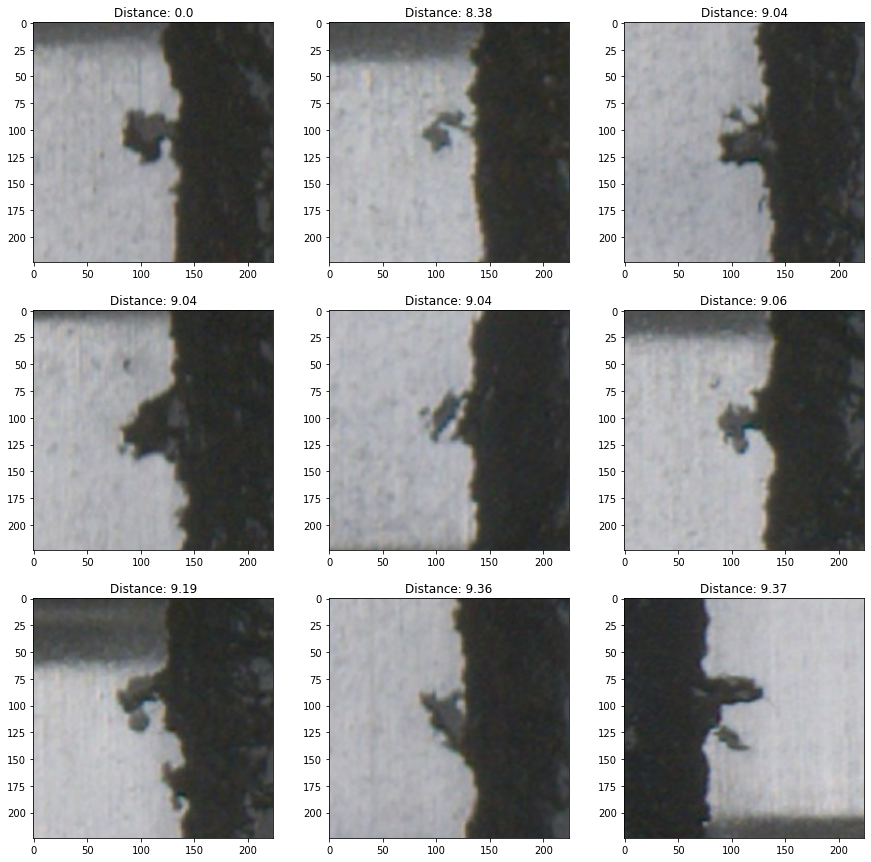

In [67]:
# Declare type (": torch.Tensor") so we can get autocomplete hints
input_tensor: torch.Tensor = transform(PIL_img)
input_tensor = input_tensor.view(1, *input_tensor.shape)

# Search index for neighbor embeddings
with torch.no_grad():
  model.eval()
  query_descriptors = pooling_output(input_tensor.to(DEVICE))
  query_descriptors = query_descriptors.cpu().view(1, -1).numpy()
  # distance, indices = index.search(query_descriptors.reshape(1, 2048), 9)
  # distances,indices = neighbors.kneighbors(query_descriptors.reshape(1, 2048))
  distances,indices = neighbors.kneighbors([features[my_index]])

fig, ax = plt.subplots(3, 3, figsize=(15,15))
i = 0
for file_index, ax_i in zip(indices[0], np.array(ax).flatten()):
  ax_i.imshow(plt.imread(img_paths[file_index]))
  ax_i.set_title("Distance: " +
              str(float("{0:.2f}".format(distances[0][i]))))
  i+=1

plt.show()

# distances,indices = neighbors.kneighbors([features[random_image_index]])
# similar_image_paths = [img_paths[indices[0][i]] for i in range(0,5)]
# plot_images(similar_image_paths, distances[0])

[[1498 1221 1342 1634   10]]
[[1019 4565 1096   22 1386]]
[[2265 2414 2373 3559 2680]]
[[3982 1159  261   28 4151]]
[[4272 3253 4292 1694 4284]]
[[4793 4802 4807 4809 2238]]


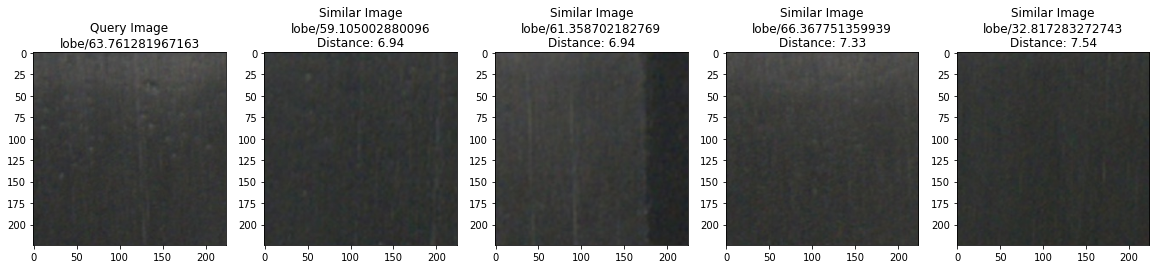

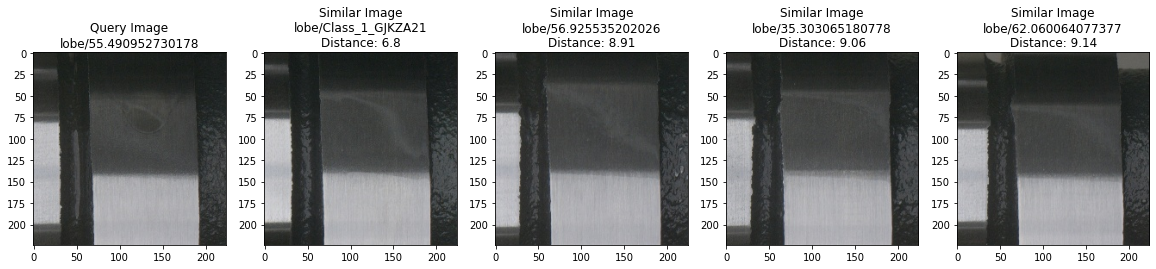

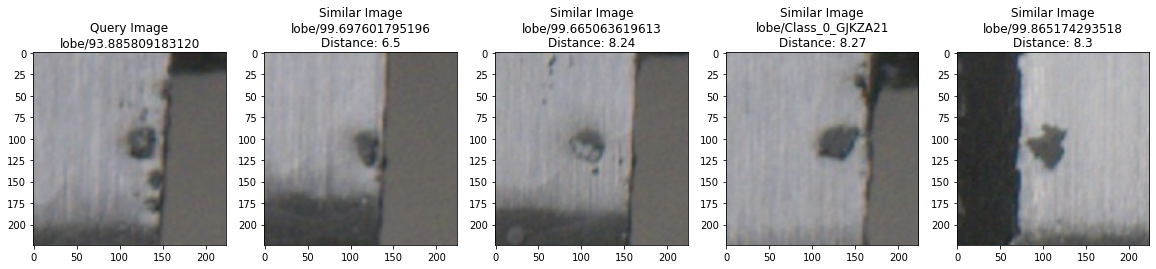

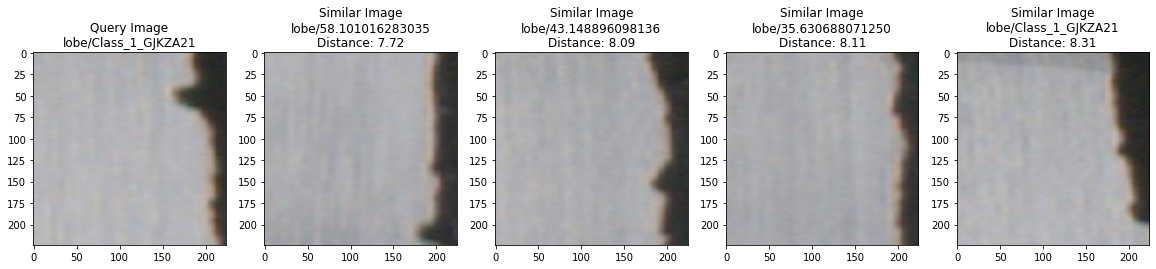

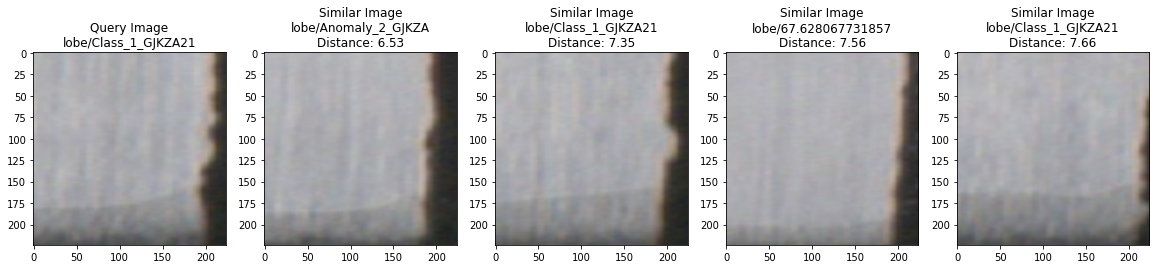

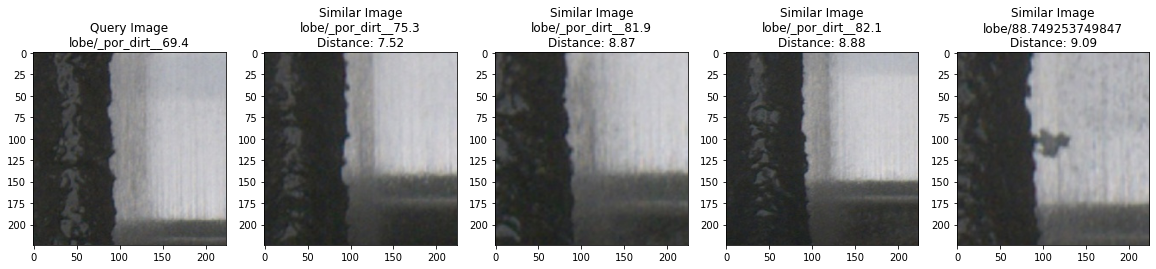

In [57]:
import random
num_images = len(img_paths)
for i in range(6):
    random_image_index = random.randint(0,num_images)
    distances,indices = neighbors.kneighbors([features[random_image_index]])
    print(indices)
    #exclude the first closest image
    similar_image_paths = [img_paths[random_image_index]] + [img_paths[indices[0][i]] for i in range(1,5)]
    plot_images(similar_image_paths, distances[0])